In [3]:
!pip install kagglehub

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [6]:
import os

# List the contents of the path
print(os.listdir(path))

['IMDB Dataset.csv']


In [7]:
import os
import zipfile

if os.path.isdir(path):
    print("Dataset extracted.")
    extracted_path = path  # Use the existing directory
else:
    print("Extracting dataset...")
    # Extract the dataset
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall("imdb_dataset")
    extracted_path = "imdb_dataset"  # Use the extracted directory

print("Contents of the extracted dataset:")
print(os.listdir(extracted_path))

Dataset extracted.
Contents of the extracted dataset:
['IMDB Dataset.csv']


In [8]:
import pandas as pd

# Path to the CSV file
csv_file = os.path.join(extracted_path, "IMDB Dataset.csv")

# Load the dataset
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [9]:
import os

# Path to the dataset in Kaggle's input directory
dataset_path = "/kaggle/input/imdb-dataset-of-50k-movie-reviews"

# List the contents of the dataset directory
print(os.listdir(dataset_path))

['IMDB Dataset.csv']


In [10]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

# Display the first few rows
print(df.head())

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9014

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [12]:
new_reviews = ["This movie was fantastic!", "I hated this film. It was boring."]
new_reviews_cleaned = [clean_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)
predictions = model.predict(new_reviews_tfidf)
print(predictions)

['positive' 'negative']


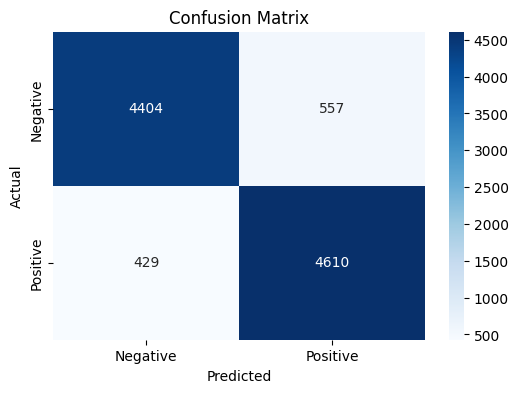

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()